In [1]:
# # !pip install geopandas
# # !pip install chardet
# # !pip install dbfread
# !pip install tqdm
# !pip install --break-system-packages geopandas
# !pip install --break-system-packages chardet
# !pip install --break-system-packages dbfread 
# !pip install --break-system-packages tqdm 
# !pip install --break-system-packages folium
# !pip install --break-system-packages pyproj



In [2]:
file_encoding = 'euc-kr'

In [3]:
import os
import geopandas as gpd
import pandas as pd
from tqdm import tqdm  # 진행률 표시 라이브러리
from shapely.geometry import Point, Polygon, LineString

# shp, shx, dbf 파일이 있는 폴더 경로 
source_dir = './data/ngi_data_국토정보플랫폼/zip_data'

# shp, shx, dbf 파일을 찾고 읽어서 하나의 GeoDataFrame으로 합침
all_files = []
shp_files = [f for f in os.listdir(source_dir) if f.endswith('.shp')]

# 총 파일 개수 출력
print(f"총 {len(shp_files)}개의 shapefile을 병합합니다.")

# 진행률 표시 (tqdm 사용)
for filename in tqdm(shp_files, desc="파일 처리 중", unit="파일"):
    shp_file = os.path.join(source_dir, filename)
    shx_file = shp_file.replace('.shp', '.shx')
    dbf_file = shp_file.replace('.shp', '.dbf')

    if os.path.exists(shx_file) and os.path.exists(dbf_file):
        # shapefile 불러오기
        gdf = gpd.read_file(shp_file, encoding=file_encoding)  # 적절한 인코딩 설정
        all_files.append(gdf)

# 모든 GeoDataFrame을 하나로 병합
combined_gdf = pd.concat(all_files, ignore_index=True)



총 3350개의 shapefile을 병합합니다.


파일 처리 중: 100%|███████████████████████| 3350/3350 [02:00<00:00, 27.84파일/s]


In [4]:

# geometry를 Polygon으로 변환하는 함수
def convert_to_polygon(geom):
    if isinstance(geom, Point):
        return geom.buffer(0.1)  # 작은 버퍼를 사용하여 Point를 Polygon으로 변환
    elif isinstance(geom, LineString):
        return geom.buffer(0.1)  # LineString을 Polygon으로 변환
    elif isinstance(geom, Polygon):
        return geom  # 이미 Polygon이면 그대로 반환
    return geom  # 그 외의 경우 그대로 반환

# 모든 geometry를 Polygon으로 변환
combined_gdf["geometry"] = combined_gdf["geometry"].apply(convert_to_polygon)

# 결과 출력 (geometry가 변환되었는지 확인)
print(combined_gdf.head())

       명칭    구분   형태                                UFID  \
0     광진구  행정지명  법정명  1000377052311H00410000000000000003   
1     광장동  행정지명  법정명  1000377052311H00410000000000000002   
2   (광장동)  행정지명  행정명  1000377052311H00410000000000000001   
3  (풍납1동)  행정지명  행정명  1000377052312H00410000000000000011   
4     풍납동  행정지명  법정명  1000377052312H00410000000000000010   

                                            geometry 관리기관   재질 상하구분  연장  높이  \
0  POLYGON ((209019.198 549241.73, 209019.198 549...  NaN  NaN  NaN NaN NaN   
1  POLYGON ((209027.042 549222.365, 209027.042 54...  NaN  NaN  NaN NaN NaN   
2  POLYGON ((209028.687 549202.105, 209028.687 54...  NaN  NaN  NaN NaN NaN   
3  POLYGON ((209619.542 549107.735, 209619.542 54...  NaN  NaN  NaN NaN NaN   
4  POLYGON ((209626.32 549125.28, 209626.32 54912...  NaN  NaN  NaN NaN NaN   

   ...  차로수 도로폭 일방통행  자동차전용 등고수치  수치 하천번호  면적  설치연도  하천명  
0  ...  NaN NaN  NaN    NaN  NaN NaN  NaN NaN   NaN  NaN  
1  ...  NaN NaN  NaN    NaN  NaN NaN  NaN NaN 

In [5]:
# 병합된 GeoDataFrame의 geometry 타입 확인
print(combined_gdf.geometry.type.unique())

['Polygon']


In [6]:
# '명칭' 컬럼명을 영어로 변경
combined_gdf.columns

Index(['명칭', '구분', '형태', 'UFID', 'geometry', '관리기관', '재질', '상하구분', '연장', '높이',
       '폭', '도엽명', '도엽코드', '통과하중', '보도', '종류', '용도', '주기', '층수', '측량방법', '도로명',
       '건물본번', '건물부번', '우편번호', '구조', '기타', '관리번호', '직경', '수령', '수종', '수용량',
       '도로번호', '도로구분', '시점', '종점', '포장재질', '분리대유무', '차로수', '도로폭', '일방통행',
       '자동차전용', '등고수치', '수치', '하천번호', '면적', '설치연도', '하천명'],
      dtype='object')

In [7]:
# 컬럼명 매핑
column_mapping = {
    '명칭': 'name',
    '구분': 'cat',
    '형태': 'type',
    'UFID': 'ufid',
    'geometry': 'geom',
    '관리기관': 'mgmt_agency',
    '재질': 'material',
    '상하구분': 'up_low',
    '연장': 'length',
    '높이': 'height',
    '폭': 'width',
    '도엽명': 'map_name',
    '도엽코드': 'map_code',
    '통과하중': 'pass_load',
    '보도': 'sidewalk',
    '종류': 'kind',
    '용도': 'purpose',
    '주기': 'cycle',
    '층수': 'floors',
    '측량방법': 'survey',
    '도로명': 'road',
    '건물본번': 'building_main',
    '건물부번': 'building_sub',
    '우편번호': 'postal',
    '구조': 'structure',
    '기타': 'etc',
    '관리번호': 'mgmt_num',
    '직경': 'diameter',
    '수령': 'age',
    '수종': 'tree_type',
    '수용량': 'capacity',
    '도로번호': 'road_num',
    '도로구분': 'road_type',
    '시점': 'start',
    '종점': 'end',
    '포장재질': 'paving',
    '분리대유무': 'separation',
    '차로수': 'lanes',
    '도로폭': 'road_width',
    '일방통행': 'one_way',
    '자동차전용': 'car_only',
    '등고수치': 'elevation',
    '수치': 'value',
    '하천번호': 'river_num',
    '면적': 'area',
    '설치연도': 'install_year',
    '하천명': 'river_name'
}

# 컬럼명 변경
combined_gdf = combined_gdf.rename(columns=column_mapping)

# 변경된 컬럼명 확인
combined_gdf.columns


Index(['name', 'cat', 'type', 'ufid', 'geom', 'mgmt_agency', 'material',
       'up_low', 'length', 'height', 'width', 'map_name', 'map_code',
       'pass_load', 'sidewalk', 'kind', 'purpose', 'cycle', 'floors', 'survey',
       'road', 'building_main', 'building_sub', 'postal', 'structure', 'etc',
       'mgmt_num', 'diameter', 'age', 'tree_type', 'capacity', 'road_num',
       'road_type', 'start', 'end', 'paving', 'separation', 'lanes',
       'road_width', 'one_way', 'car_only', 'elevation', 'value', 'river_num',
       'area', 'install_year', 'river_name'],
      dtype='object')

In [8]:
# 작업 전 컬럼명 확인
print("작업 전 컬럼명:")
print(combined_gdf.columns)

작업 전 컬럼명:
Index(['name', 'cat', 'type', 'ufid', 'geom', 'mgmt_agency', 'material',
       'up_low', 'length', 'height', 'width', 'map_name', 'map_code',
       'pass_load', 'sidewalk', 'kind', 'purpose', 'cycle', 'floors', 'survey',
       'road', 'building_main', 'building_sub', 'postal', 'structure', 'etc',
       'mgmt_num', 'diameter', 'age', 'tree_type', 'capacity', 'road_num',
       'road_type', 'start', 'end', 'paving', 'separation', 'lanes',
       'road_width', 'one_way', 'car_only', 'elevation', 'value', 'river_num',
       'area', 'install_year', 'river_name'],
      dtype='object')


In [9]:
# 컬럼명 축약 작업
def shorten_column_names(gdf):
    gdf.columns = [col[:10] for col in gdf.columns]  # 10자 이하로 잘라서 컬럼 이름 수정
    return gdf

# 컬럼 이름을 10자 이하로 변경
combined_gdf = shorten_column_names(combined_gdf)

In [10]:
# 작업 후 컬럼명 확인
print("\n작업 후 컬럼명:")
print(combined_gdf.columns)


작업 후 컬럼명:
Index(['name', 'cat', 'type', 'ufid', 'geom', 'mgmt_agenc', 'material',
       'up_low', 'length', 'height', 'width', 'map_name', 'map_code',
       'pass_load', 'sidewalk', 'kind', 'purpose', 'cycle', 'floors', 'survey',
       'road', 'building_m', 'building_s', 'postal', 'structure', 'etc',
       'mgmt_num', 'diameter', 'age', 'tree_type', 'capacity', 'road_num',
       'road_type', 'start', 'end', 'paving', 'separation', 'lanes',
       'road_width', 'one_way', 'car_only', 'elevation', 'value', 'river_num',
       'area', 'install_ye', 'river_name'],
      dtype='object')


In [11]:
# 인코딩을 사용하여 Shapefile로 저장
combined_gdf.to_file("combined_shapefile.shp", driver="ESRI Shapefile", encoding=file_encoding)


In [12]:
combined_gdf['elevation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 210821 entries, 0 to 210820
Series name: elevation
Non-Null Count  Dtype  
--------------  -----  
3848 non-null   float64
dtypes: float64(1)
memory usage: 1.6 MB


In [13]:
print(combined_gdf['elevation'].isnull().sum())

206973


In [14]:
(1 - 206973 / 210821) * 100

1.8252451131528624

In [15]:
# elevation 컬럼에서 null 값이 있는 행을 제거
not_null_data = combined_gdf[combined_gdf['elevation'].notnull()]

# 결과 확인
print(not_null_data)


       name  cat type                                ufid  \
4574    NaN  계곡선  NaN  1000377051882F00110000000000000259   
4575    NaN  계곡선  NaN  1000377051882F00110000000000000255   
4576    NaN  계곡선  NaN  1000377051882F00110000000000000254   
4577    NaN  계곡선  NaN  1000377051882F00110000000000000252   
4578    NaN  계곡선  NaN  1000377051882F00110000000000000250   
...     ...  ...  ...                                 ...   
206106  NaN  계곡선  NaN  1000377052242F00110000000000000011   
206107  NaN  계곡선  NaN  1000377052242F00110000000000000010   
206108  NaN  계곡선  NaN  1000377052242F00110000000000000009   
206109  NaN  계곡선  NaN  1000377052242F00110000000000000008   
206110  NaN  계곡선  NaN  1000377052242F00110000000000000003   

                                                     geom mgmt_agenc material  \
4574    POLYGON ((209279.407 550765.505, 209279.928 55...        NaN      NaN   
4575    POLYGON ((209346.484 550762.37, 209346.481 550...        NaN      NaN   
4576    POLYGON ((209365

In [16]:
not_null_data.to_file("combined_shapefile_not_null.shp", driver="ESRI Shapefile", encoding=file_encoding)

In [17]:
not_null_data = not_null_data.reset_index(drop=True)
not_null_data.index = not_null_data.index + 1
# not_null_data

In [18]:
print(not_null_data.columns)


Index(['name', 'cat', 'type', 'ufid', 'geom', 'mgmt_agenc', 'material',
       'up_low', 'length', 'height', 'width', 'map_name', 'map_code',
       'pass_load', 'sidewalk', 'kind', 'purpose', 'cycle', 'floors', 'survey',
       'road', 'building_m', 'building_s', 'postal', 'structure', 'etc',
       'mgmt_num', 'diameter', 'age', 'tree_type', 'capacity', 'road_num',
       'road_type', 'start', 'end', 'paving', 'separation', 'lanes',
       'road_width', 'one_way', 'car_only', 'elevation', 'value', 'river_num',
       'area', 'install_ye', 'river_name'],
      dtype='object')


In [19]:
# 'geom' 컬럼을 'geometry'로 설정 (이름 변경)
not_null_data = not_null_data.rename(columns={'geom': 'geometry'})

# GeoDataFrame으로 변환 (geometry 컬럼을 기준으로 설정)
not_null_data = not_null_data.set_geometry('geometry')



In [20]:
print(not_null_data.columns)

Index(['name', 'cat', 'type', 'ufid', 'geometry', 'mgmt_agenc', 'material',
       'up_low', 'length', 'height', 'width', 'map_name', 'map_code',
       'pass_load', 'sidewalk', 'kind', 'purpose', 'cycle', 'floors', 'survey',
       'road', 'building_m', 'building_s', 'postal', 'structure', 'etc',
       'mgmt_num', 'diameter', 'age', 'tree_type', 'capacity', 'road_num',
       'road_type', 'start', 'end', 'paving', 'separation', 'lanes',
       'road_width', 'one_way', 'car_only', 'elevation', 'value', 'river_num',
       'area', 'install_ye', 'river_name'],
      dtype='object')


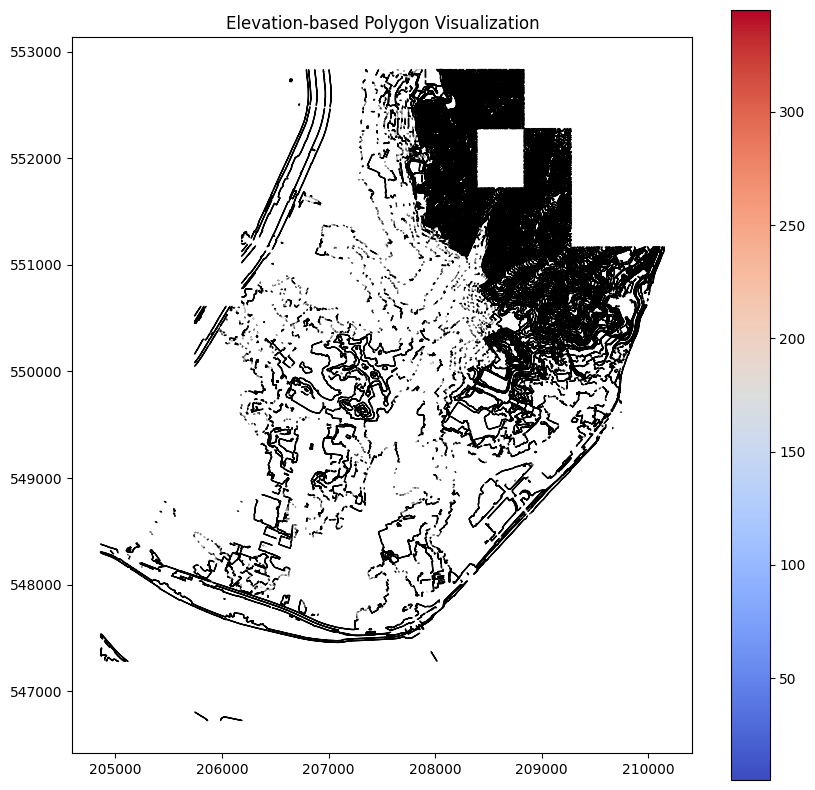

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 'not_null_data'는 이미 전처리된 DataFrame이라고 가정
# 'geometry' 컬럼이 POLYGON 형식이고 'elevation' 컬럼에 고도 데이터가 포함되어 있음

# Geopandas GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(not_null_data, geometry='geometry')

# 고도 데이터에 따라 색상 맵을 설정
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(vmin=gdf['elevation'].min(), vmax=gdf['elevation'].max())

# 폴리곤을 시각화
fig, ax = plt.subplots(figsize=(10, 10))

# POLYGON을 고도 데이터에 맞춰 색상으로 시각화
gdf.plot(ax=ax, column='elevation', cmap=cmap, legend=True, norm=norm, edgecolor='black')

# 제목 추가
plt.title("Elevation-based Polygon Visualization")
plt.show()


Data size: 3848


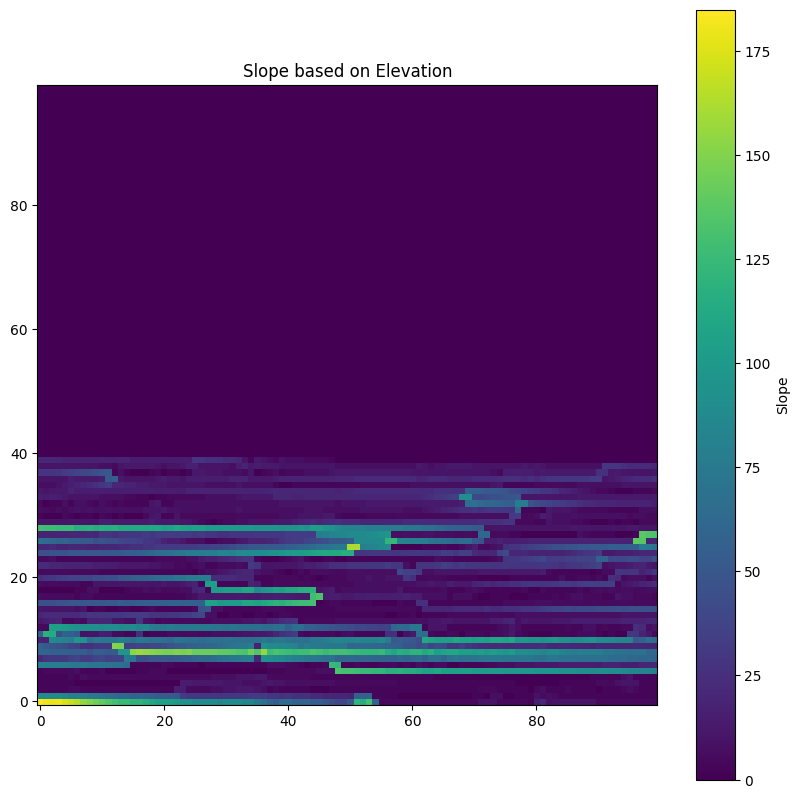

In [22]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# 'not_null_data'는 이미 전처리된 DataFrame이고, 'geometry' 컬럼은 POLYGON 형식, 'elevation' 컬럼에 고도 데이터 포함
gdf = gpd.GeoDataFrame(not_null_data, geometry='geometry')

# 고도 데이터 확인 (데이터 크기 체크)
elevation_data = gdf['elevation'].to_numpy()

# 데이터 크기 확인
data_size = len(elevation_data)
print(f"Data size: {data_size}")

# 원하는 크기 (10000x10000)로 데이터 크기를 맞추기 위해 크기를 계산
rows = 100
columns = 100

# 데이터 크기 맞추기 위해 패딩 추가
if data_size < rows * columns:
    # 필요한 만큼 패딩 추가 (0으로 패딩)
    padding_size = rows * columns - data_size
    elevation_data = np.pad(elevation_data, (0, padding_size), mode='constant', constant_values=0)

# 데이터를 10000x10000 배열로 재구성
elevation_array = elevation_data.reshape((rows, columns))

# 경사도 계산 (x, y 방향의 gradient)
gradient_x, gradient_y = np.gradient(elevation_array)

# 경사도의 크기 계산 (각 방향의 제곱합의 제곱근)
slope = np.sqrt(gradient_x**2 + gradient_y**2)

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(slope, cmap='viridis', origin='lower')  # 경사도를 색상으로 표현
plt.colorbar(label='Slope')
plt.title('Slope based on Elevation')
plt.show()


In [23]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# 'not_null_data'는 이미 전처리된 DataFrame이고, 'geometry' 컬럼은 POLYGON 형식, 'elevation' 컬럼에 고도 데이터 포함
gdf = gpd.GeoDataFrame(not_null_data, geometry='geometry')

# 고도 데이터 확인 (데이터 크기 체크)
elevation_data = gdf['elevation'].to_numpy()

# 데이터 크기 확인
data_size = len(elevation_data)
print(f"Data size: {data_size}")

# 원하는 크기 (10000x10000)로 데이터 크기를 맞추기 위해 크기를 계산
rows = 10000
columns = 10000

# 데이터 크기 맞추기 위해 패딩 추가
if data_size < rows * columns:
    # 필요한 만큼 패딩 추가 (0으로 패딩)
    padding_size = rows * columns - data_size
    elevation_data = np.pad(elevation_data, (0, padding_size), mode='constant', constant_values=0)

# 데이터를 10000x10000 배열로 재구성
elevation_array = elevation_data.reshape((rows, columns))

# 옆에 있는 애와의 고도 차이를 구하기 위해, 각 위치에서 오른쪽과 아래쪽의 차이를 계산
# 오른쪽
right_difference = np.diff(elevation_array, axis=1)  # (rows, columns-1)
# 아래쪽
down_difference = np.diff(elevation_array, axis=0)  # (rows-1, columns)

# 높이차 출력 (각 위치별로 오른쪽 및 아래쪽과의 차이)
height_difference = {}

for i in range(rows-1):
    for j in range(columns-1):
        # 오른쪽과 아래쪽 차이 저장
        height_difference[(i, j)] = {
            'right_diff': right_difference[i, j] if j < columns - 1 else None,
            'down_diff': down_difference[i, j] if i < rows - 1 else None
        }
 
# 데이터 파일로 저장
with open('height_difference.txt', 'w') as f:
    for key, value in height_difference.items():
        f.write(f"Position {key} -> Right Diff: {value['right_diff']}, Down Diff: {value['down_diff']}\n")


Data size: 3848


In [24]:
import geopandas as gpd
import numpy as np
import pandas as pd

# 'not_null_data'는 이미 전처리된 DataFrame이고, 'geometry' 컬럼은 POLYGON 형식, 'elevation' 컬럼에 고도 데이터 포함
gdf = gpd.GeoDataFrame(not_null_data, geometry='geometry')

# 고도 데이터 확인 (데이터 크기 체크)
elevation_data = gdf['elevation'].to_numpy()

# 데이터 크기 확인
data_size = len(elevation_data)
print(f"Data size: {data_size}")

# 원하는 크기 (10000x10000)로 데이터 크기를 맞추기 위해 크기를 계산
rows = 10000
columns = 10000

# 데이터 크기 맞추기 위해 패딩 추가
if data_size < rows * columns:
    # 필요한 만큼 패딩 추가 (0으로 패딩)
    padding_size = rows * columns - data_size
    elevation_data = np.pad(elevation_data, (0, padding_size), mode='constant', constant_values=0)

# 데이터를 10000x10000 배열로 재구성
elevation_array = elevation_data.reshape((rows, columns))

# 옆에 있는 애와의 고도 차이를 구하기 위해, 각 위치에서 오른쪽과 아래쪽의 차이를 계산
# 오른쪽
right_difference = np.diff(elevation_array, axis=1)  # (rows, columns-1)
# 아래쪽
down_difference = np.diff(elevation_array, axis=0)  # (rows-1, columns)

# 높이차 출력 (각 위치별로 오른쪽 및 아래쪽과의 차이)
height_difference_list = []

for i in range(rows-1):
    for j in range(columns-1):
        # 오른쪽과 아래쪽 차이 저장
        position = (i, j)
        
        # 폴리곤의 중심 좌표 가져오기 (좌표계가 WGS84일 경우)
        polygon = gdf.iloc[position[0]]['geometry']  # 해당 행의 geometry 가져오기
        centroid = polygon.centroid
        latitude, longitude = centroid.y, centroid.x  # 중심 좌표 추출
        
        height_difference_list.append({
            'latitude': latitude,
            'longitude': longitude,
            'right_diff': right_difference[i, j] if j < columns - 1 else None,
            'down_diff': down_difference[i, j] if i < rows - 1 else None
        })

# DataFrame으로 변환하여 CSV로 저장
df = pd.DataFrame(height_difference_list)
df.to_csv('height_difference_with_coordinates.csv', index=False)

print("CSV 파일이 저장되었습니다.")


Data size: 3848


IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# CSV 파일 불러오기
df = pd.read_csv('height_difference_with_coordinates.csv')

# 위도, 경도를 기반으로 폴리곤 위치 생성 (가정: 고정된 크기의 폴리곤)
# 여기서는 예시로 각 좌표를 (0.001) 단위로 약간씩 이동시켜 폴리곤을 생성합니다.
polygons = []
for index, row in df.iterrows():
    # 위도, 경도에서 약간씩 이동하여 폴리곤을 생성
    lat, lon = row['latitude'], row['longitude']
    # 예시로 4개의 점을 이용하여 사각형 폴리곤 생성
    polygon = Polygon([
        (lon - 0.0001, lat - 0.0001), 
        (lon + 0.0001, lat - 0.0001), 
        (lon + 0.0001, lat + 0.0001),
        (lon - 0.0001, lat + 0.0001)
    ])
    polygons.append(polygon)

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(df, geometry=polygons)

# 고도 차이를 색상으로 시각화 (예: 오른쪽 차이만 사용)
gdf['right_diff'] = df['right_diff']

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='right_diff', ax=ax, legend=True, 
         legend_kwds={'label': "Right Elevation Difference",
                      'orientation': "horizontal"}, 
         cmap='coolwarm')

# 제목 추가
ax.set_title("Elevation Difference Visualization (Right Diff)", fontsize=15)

# 축 레이블 설정
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# 시각화 결과 출력
plt.show()


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# 'not_null_data'는 이미 전처리된 DataFrame이고, 'geometry' 컬럼은 POLYGON 형식, 'elevation' 컬럼에 고도 데이터 포함
gdf = gpd.GeoDataFrame(not_null_data, geometry='geometry')

# 고도 데이터 확인 (데이터 크기 체크)
elevation_data = gdf['elevation'].to_numpy()

# 데이터 크기 확인
data_size = len(elevation_data)
print(f"Data size: {data_size}")

# 가장 가까운 정사각형 크기로 맞추기 위해 side_length를 계산
side_length = int(np.ceil(np.sqrt(data_size)))

# 데이터 크기 맞추기 위해 패딩 추가
padded_size = side_length**2
elevation_data_padded = np.pad(elevation_data, (0, padded_size - data_size), mode='constant', constant_values=np.nan)

# 배열로 변환
elevation_array = elevation_data_padded.reshape((side_length, side_length))

# 옆에 있는 애와의 고도 차이를 구하기 위해, 각 위치에서 오른쪽과 아래쪽의 차이를 계산
# 오른쪽
right_difference = np.diff(elevation_array, axis=1)  # (side_length, side_length-1)
# 아래쪽
down_difference = np.diff(elevation_array, axis=0)  # (side_length-1, side_length)

# 높이차 출력 (각 위치별로 오른쪽 및 아래쪽과의 차이)
height_difference = {}

for i in range(side_length - 1):
    for j in range(side_length - 1):
        # 오른쪽과 아래쪽 차이 저장
        height_difference[(i, j)] = {
            'right_diff': right_difference[i, j] if j < side_length - 1 else None,
            'down_diff': down_difference[i, j] if i < side_length - 1 else None
        }

# 예시로 첫 몇 개의 위치만 출력
for key, value in list(height_difference.items())[:5]:
    print(f"Position {key} -> Right Diff: {value['right_diff']}, Down Diff: {value['down_diff']}")


In [ ]:
print('Sibal~')